In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data=pd.ExcelFile('C:\\Users\\Arunima Dutta\\Downloads\\Airline.xlsx')
data.sheet_names

['Airline Dataset1', 'TestDataSet']

In [3]:
tdata= data.parse('Airline Dataset1')
df= pd.DataFrame(tdata)
del df['SL. No.']
df

,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
0,0,77.2,39,69,0,0,3,1,5,4,11854.27
1,0,45.3,34,10,4,1,11,1,2,4,14968.50
2,0,70.9,36,17,1,2,7,1,1,4,5859.32
3,0,35.1,31,28,1,4,9,1,7,4,2774.19
4,0,41.8,33,17,4,6,28,1,7,4,3833.66
5,1,47.4,43,38,4,2,10,1,7,4,5438.05
6,1,72.4,43,11,6,1,13,3,2,4,44650.78
7,0,38.1,46,63,0,0,10,1,1,4,6005.25
8,0,57.8,39,50,2,4,31,1,7,4,2846.38
9,0,14.1,46,15,1,0,11,2,7,4,1872.34


In [4]:
df.shape

(4999, 11)

In [5]:
df.isna().sum()

Class           0
Age             0
time            0
adv_bookdays    0
weekday         0
month           0
monthday        0
demand          0
from_ind        0
to_ind          0
Fare            0
dtype: int64

In [6]:
df.describe()


,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,0.257051,48.478436,37.325465,23.414283,3.035207,4.331266,15.372474,1.267654,3.606721,3.985997,8525.626751
std,0.437052,18.635317,5.992250,15.141569,2.006582,2.817279,8.862410,0.538230,1.990615,2.043300,6521.815943
min,0.000000,12.800000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1132.820000
25%,0.000000,33.900000,33.000000,12.000000,1.000000,2.000000,8.000000,1.000000,2.000000,2.000000,4359.290000
50%,0.000000,48.100000,38.000000,21.000000,3.000000,4.000000,15.000000,1.000000,3.000000,4.000000,6626.410000
75%,1.000000,64.100000,42.000000,33.000000,5.000000,7.000000,23.000000,1.000000,5.000000,6.000000,10546.235000
max,1.000000,83.700000,48.000000,95.000000,6.000000,11.000000,31.000000,5.000000,7.000000,7.000000,84141.470000


In [7]:
print(df.dtypes)

Class             int64
Age             float64
time              int64
adv_bookdays      int64
weekday           int64
month             int64
monthday          int64
demand            int64
from_ind          int64
to_ind            int64
Fare            float64
dtype: object


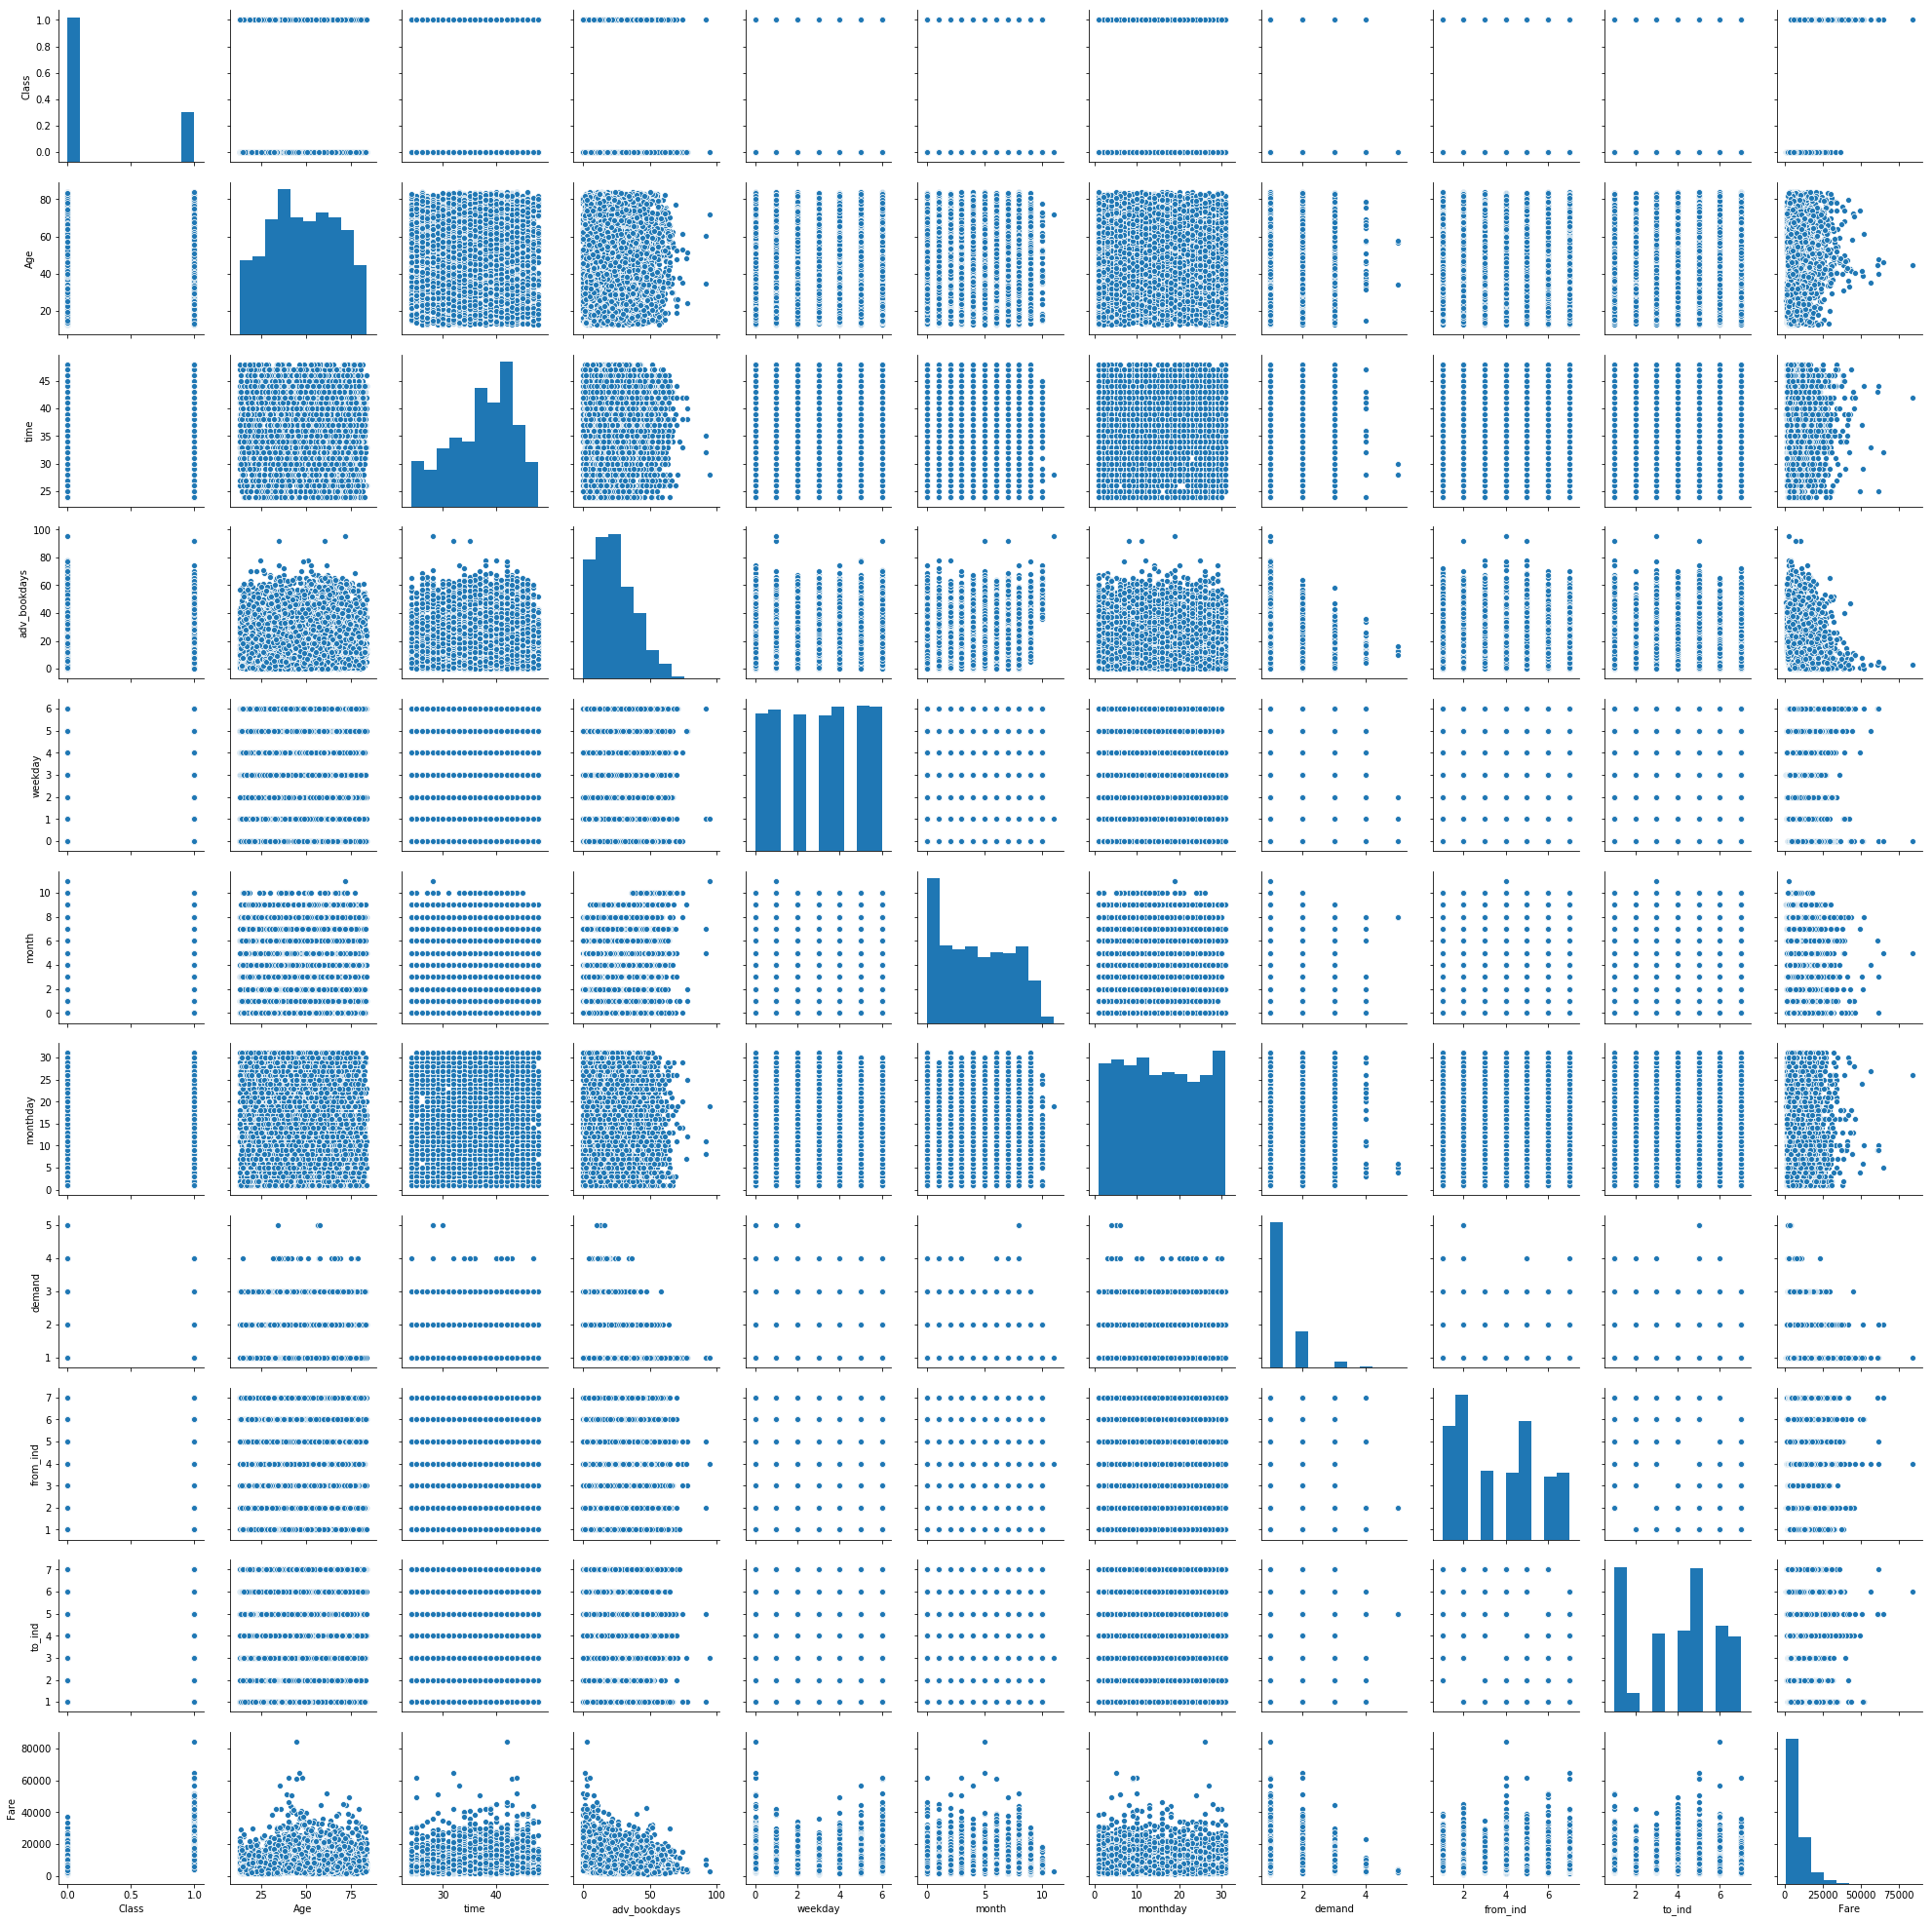

In [8]:
sns.pairplot(df)

(array([1.322e+03, 1.676e+03, 8.660e+02, 4.770e+02, 2.550e+02, 1.440e+02,
        9.500e+01, 6.500e+01, 4.200e+01, 1.800e+01, 9.000e+00, 1.000e+01,
        6.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 1132.82 ,  4453.166,  7773.512, 11093.858, 14414.204, 17734.55 ,
        21054.896, 24375.242, 27695.588, 31015.934, 34336.28 , 37656.626,
        40976.972, 44297.318, 47617.664, 50938.01 , 54258.356, 57578.702,
        60899.048, 64219.394, 67539.74 , 70860.086, 74180.432, 77500.778,
        80821.124, 84141.47 ]),
 <a list of 25 Patch objects>)

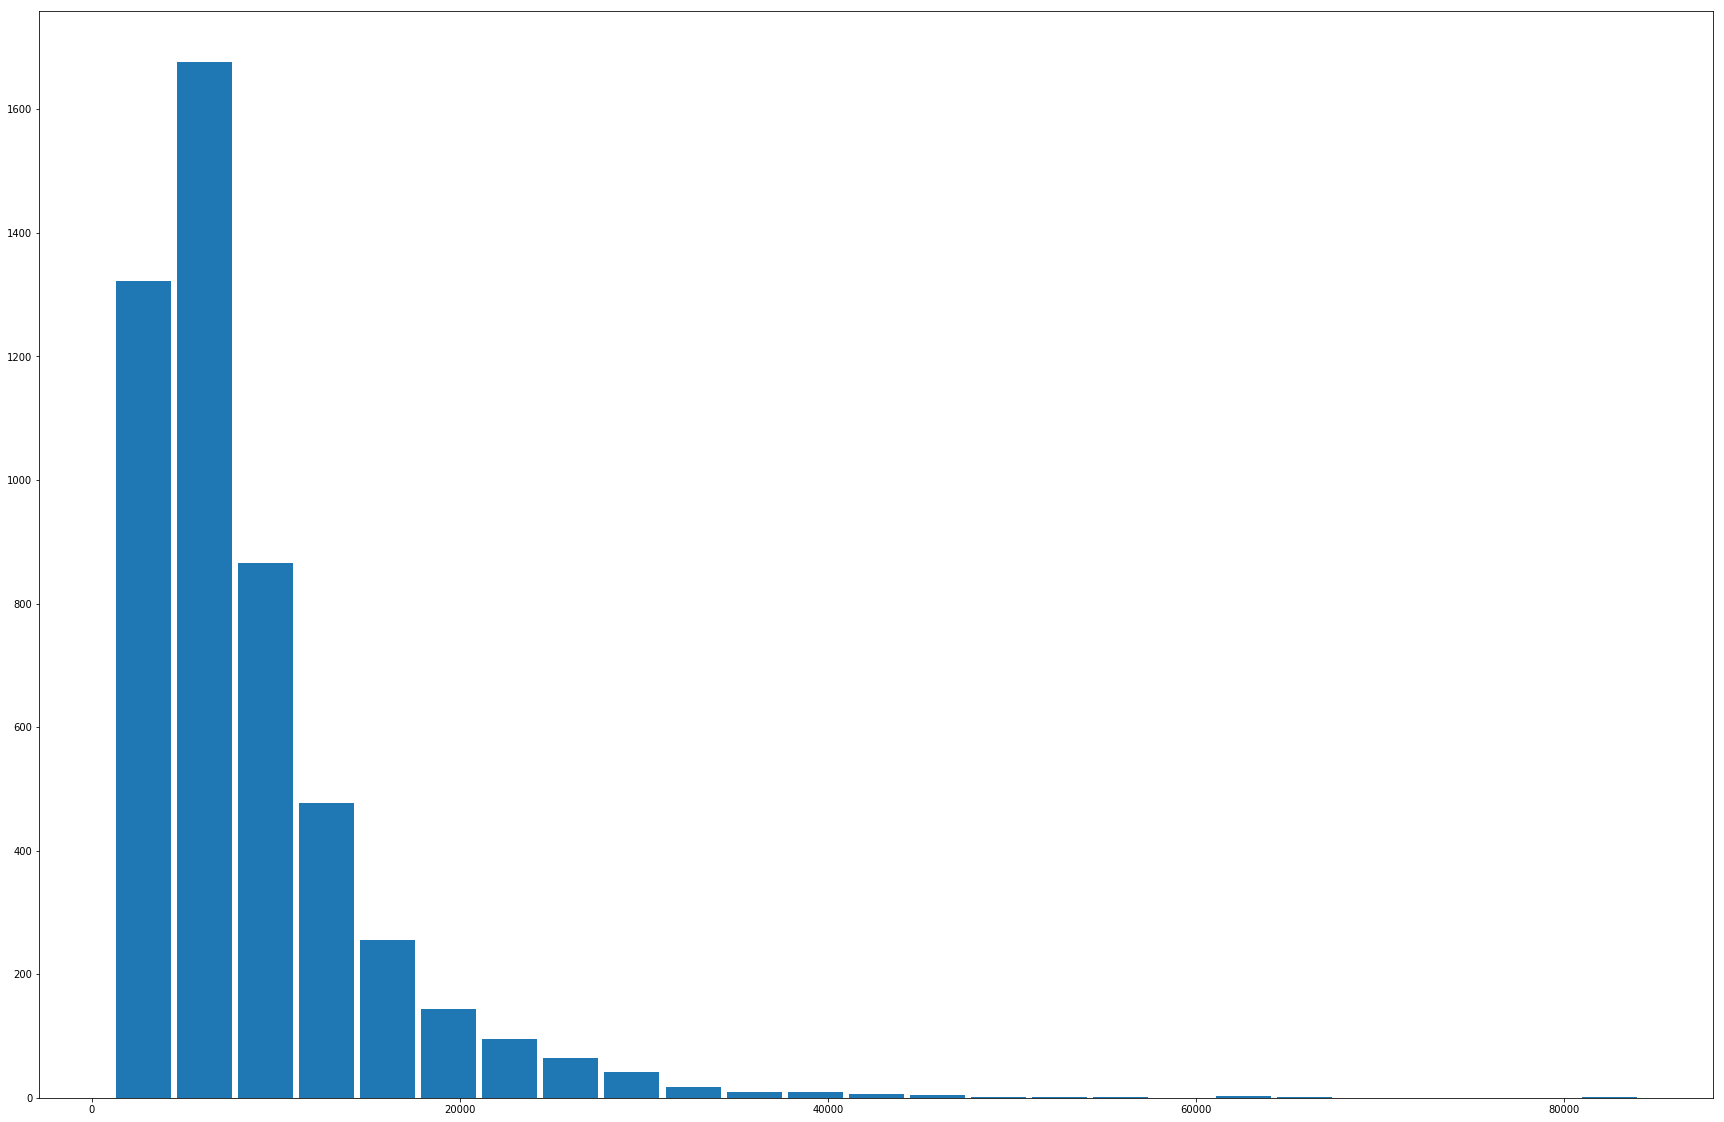

In [9]:
plt.figure(figsize = (30, 20))
plt.hist(data = df , x = "Fare"  ,bins = 25, rwidth=0.9 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF784A77B8>,
      dtype=object)

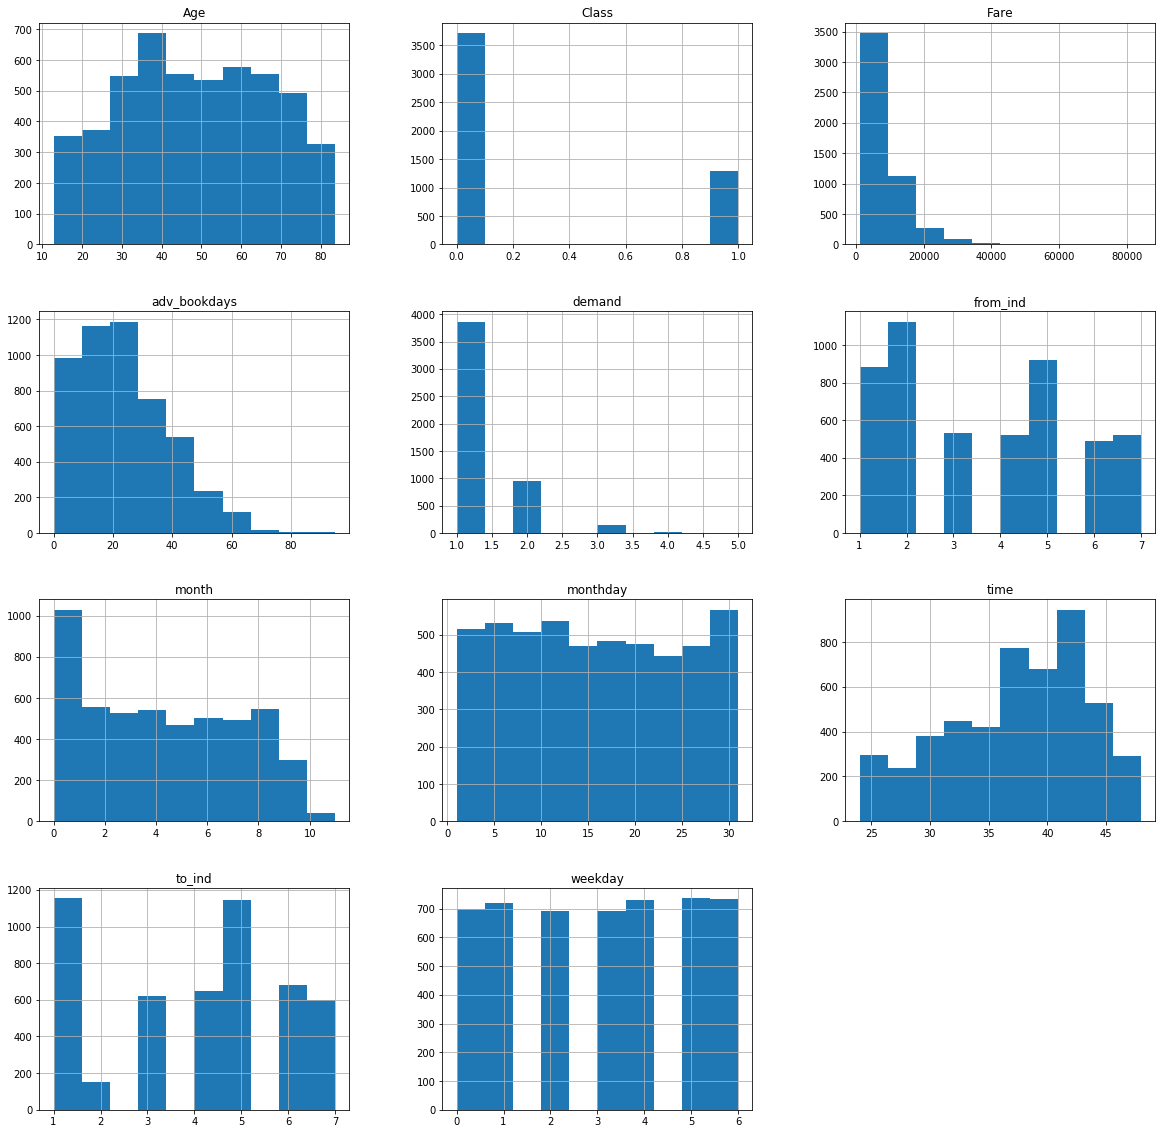

In [10]:
plt.rcParams["figure.figsize"] = 20,20
df.hist()

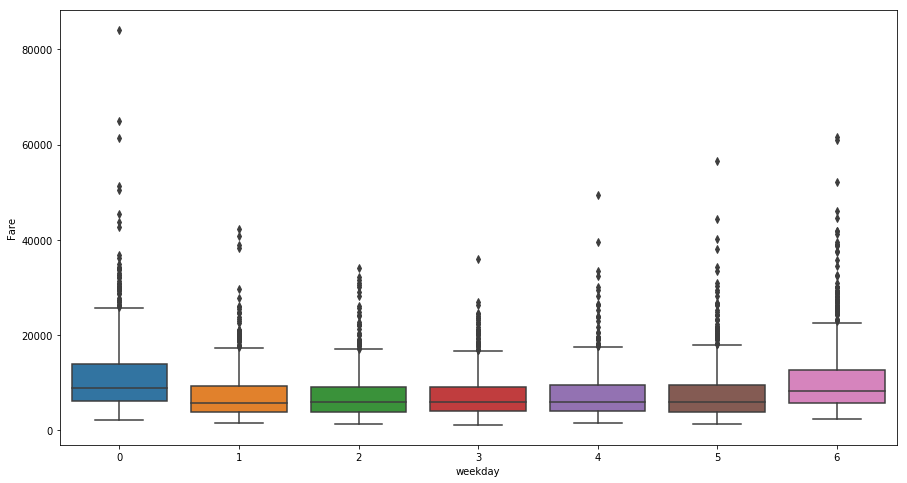

(array([ 49,  75, 195, 205, 279, 335, 355, 644, 681], dtype=int64),)
(array([ 54,  55,  72, 197, 403, 441, 622, 630, 632, 664, 688, 697, 718],
      dtype=int64),)
(array([  3,  48,  53,  75, 110, 138, 147, 154, 196, 287, 461, 607, 671,
       676], dtype=int64),)
(array([ 45, 105, 176, 323, 347, 439, 462, 476, 478, 543, 576, 675],
      dtype=int64),)
(array([ 22,  40,  43,  45,  57, 128, 199, 295, 383, 550, 568, 624, 692,
       727], dtype=int64),)
(array([  1,  32,  33,  47,  63,  66,  79,  90, 114, 138, 188, 266, 267,
       492, 657], dtype=int64),)
(array([  0,   7,  42,  79,  90, 157, 174, 286, 316, 355, 409, 509, 537,
       689, 710], dtype=int64),)


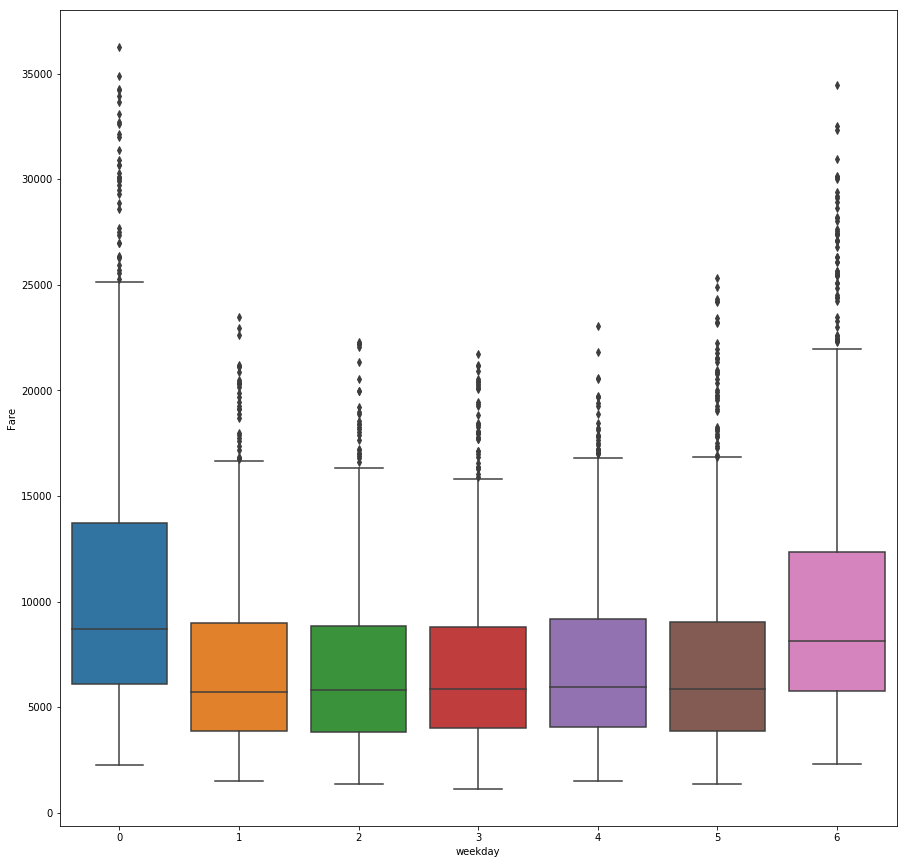

In [11]:
plt.figure(figsize = (15 , 8))
sns.boxplot(y="Fare",x="weekday", data=df)
plt.show()
df1 = df[df['weekday'] == 0]
z = np.abs(stats.zscore(df1['Fare']))
print(np.where(z>3))
df1 = df1[(z <3)]
df2 = df[df['weekday'] == 1]
z = np.abs(stats.zscore(df2['Fare']))
print(np.where(z>3))
df2 = df2[(z <3)]
df3 = df[df['weekday'] == 2]
z = np.abs(stats.zscore(df3['Fare']))
print(np.where(z>3))
df3 = df3[(z <3)]
df4 = df[df['weekday'] == 3]
z = np.abs(stats.zscore(df4['Fare']))
print(np.where(z>3))
df4 = df4[(z <3)]
df5 = df[df['weekday'] == 4]
z = np.abs(stats.zscore(df5['Fare']))
print(np.where(z>3))
df5 = df5[(z <3)]
df6 = df[df['weekday'] == 5]
z = np.abs(stats.zscore(df6['Fare']))
print(np.where(z>3))
df6 = df6[(z <3)]
df7 = df[df['weekday'] == 6]
z = np.abs(stats.zscore(df7['Fare']))
print(np.where(z>3))
df7= df7[(z <3)]
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
plt.figure(figsize = (15 , 15))
sns.boxplot(y="Fare",x="weekday", data=df)
plt.show()

2     545
4     536
8     527
3     515
1     510
0     500
6     489
7     484
5     464
9     294
10     42
11      1
Name: month, dtype: int64


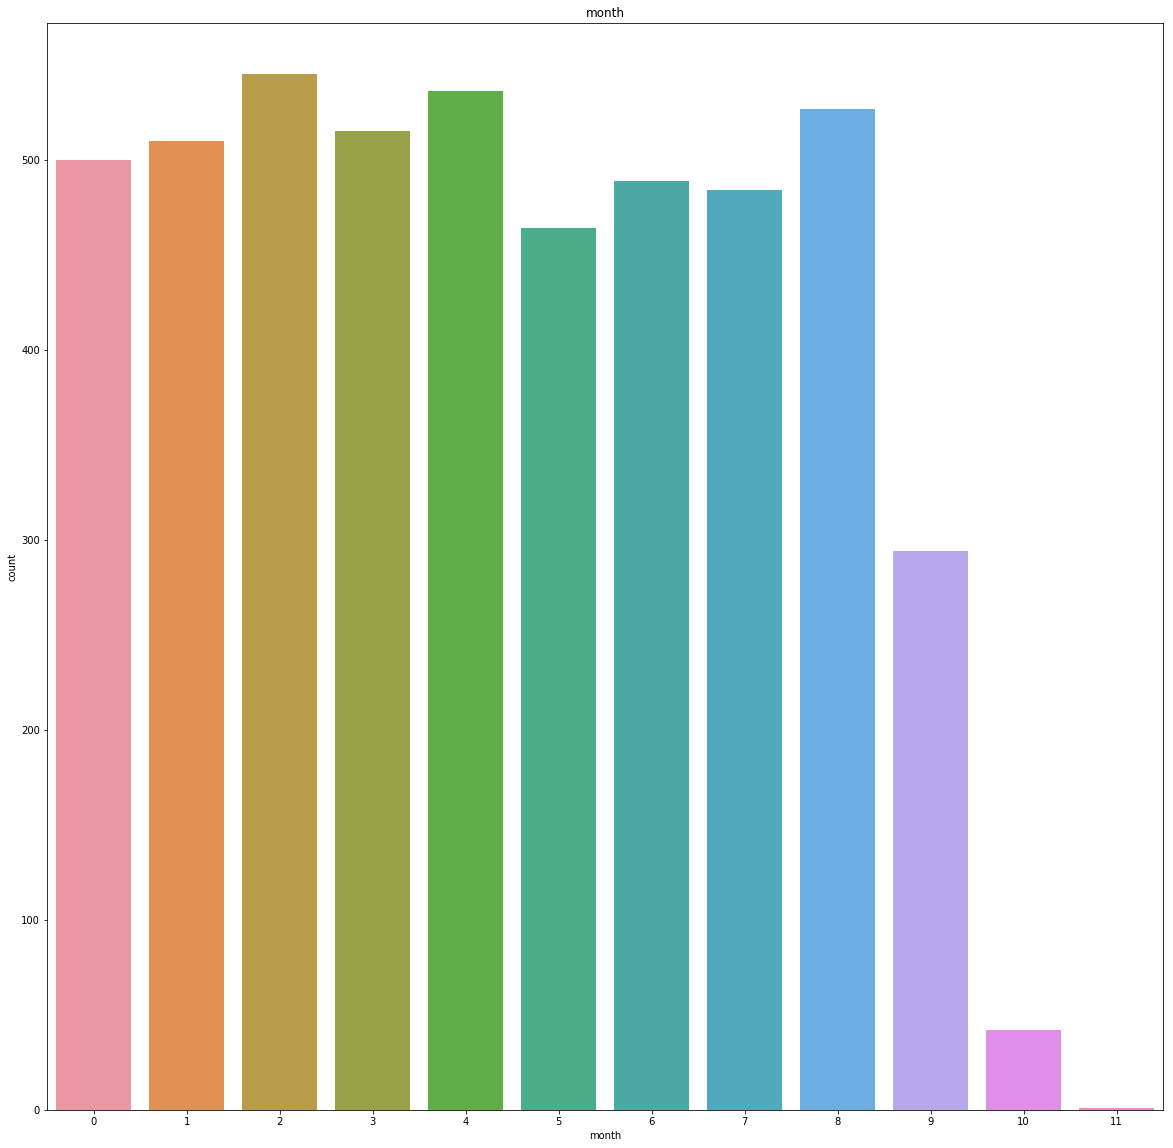

(array([ 30,  56,  65,  77, 420, 422, 432, 433, 463, 474, 492], dtype=int64),)
(array([  8,  10,  13,  45,  58,  64, 465, 469, 485], dtype=int64),)
(array([  5,   7,  17,  29, 500, 517, 523], dtype=int64),)
(array([ 35,  36,  52, 428, 454, 464, 471, 487, 506], dtype=int64),)
(array([  0,  30,  37,  41,  44,  63,  79, 469, 529], dtype=int64),)
(array([ 26,  30,  56, 362, 389, 394, 433, 454, 458], dtype=int64),)
(array([  3,  34, 358, 421, 423, 443, 456, 460, 461, 475], dtype=int64),)
(array([  6,  13,  19, 396, 422, 454], dtype=int64),)
(array([  4,   7,  20,  23,  25,  38,  49,  55,  64, 480, 504, 506],
      dtype=int64),)
(array([  2,  44, 210, 250, 267], dtype=int64),)
(array([], dtype=int64),)


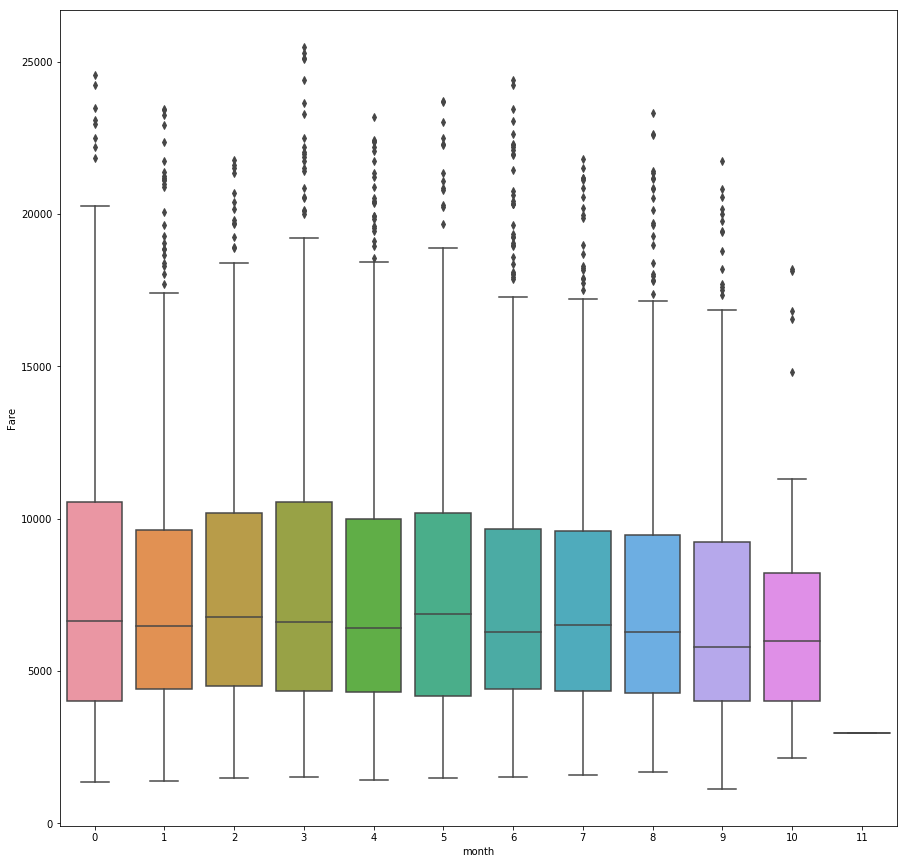

In [12]:
month_count = df['month'].value_counts()
print(month_count)
sns.barplot(month_count.index, month_count.values)
plt.title('month')
plt.ylabel('count')
plt.xlabel('month')
plt.show()
df1 = df[df['month'] == 0]
z = np.abs(stats.zscore(df1['Fare']))
print(np.where(z>3))
df1 = df1[(z <3)]
df2 = df[df['month'] == 1]
z = np.abs(stats.zscore(df2['Fare']))
print(np.where(z>3))
df2 = df2[(z <3)]
df3 = df[df['month'] == 2]
z = np.abs(stats.zscore(df3['Fare']))
print(np.where(z>3))
df3 = df3[(z <3)]
df4 = df[df['month'] == 3]
z = np.abs(stats.zscore(df4['Fare']))
print(np.where(z>3))
df4 = df4[(z <3)]
df5 = df[df['month'] == 4]
z = np.abs(stats.zscore(df5['Fare']))
print(np.where(z>3))
df5 = df5[(z <3)]
df6 = df[df['month'] == 5]
z = np.abs(stats.zscore(df6['Fare']))
print(np.where(z>3))
df6 = df6[(z <3)]
df7 = df[df['month'] == 6]
z = np.abs(stats.zscore(df7['Fare']))
print(np.where(z>3))
df7 = df7[(z <3)]
df8 = df[df['month'] == 7]
z = np.abs(stats.zscore(df8['Fare']))
print(np.where(z>3))
df8 = df8[(z <3)]

df9 = df[df['month'] == 8]
z = np.abs(stats.zscore(df9['Fare']))
print(np.where(z>3))
df9 = df9[(z <3)]

df10 = df[df['month'] == 9]
z = np.abs(stats.zscore(df10['Fare']))
print(np.where(z>3))
df10 = df10[(z <3)]

df11 = df[df['month'] == 10]
z = np.abs(stats.zscore(df11['Fare']))
print(np.where(z>3))
df11 = df11[(z <3)]

df12 = df[df['month'] == 11]

df = pd.concat([df1,df2,df3, df4, df5, df6, df7, df8, df9,df10,df11,df12])
plt.figure(figsize = (15 , 15))
sns.boxplot(y="Fare",x="month", data=df)
plt.show()

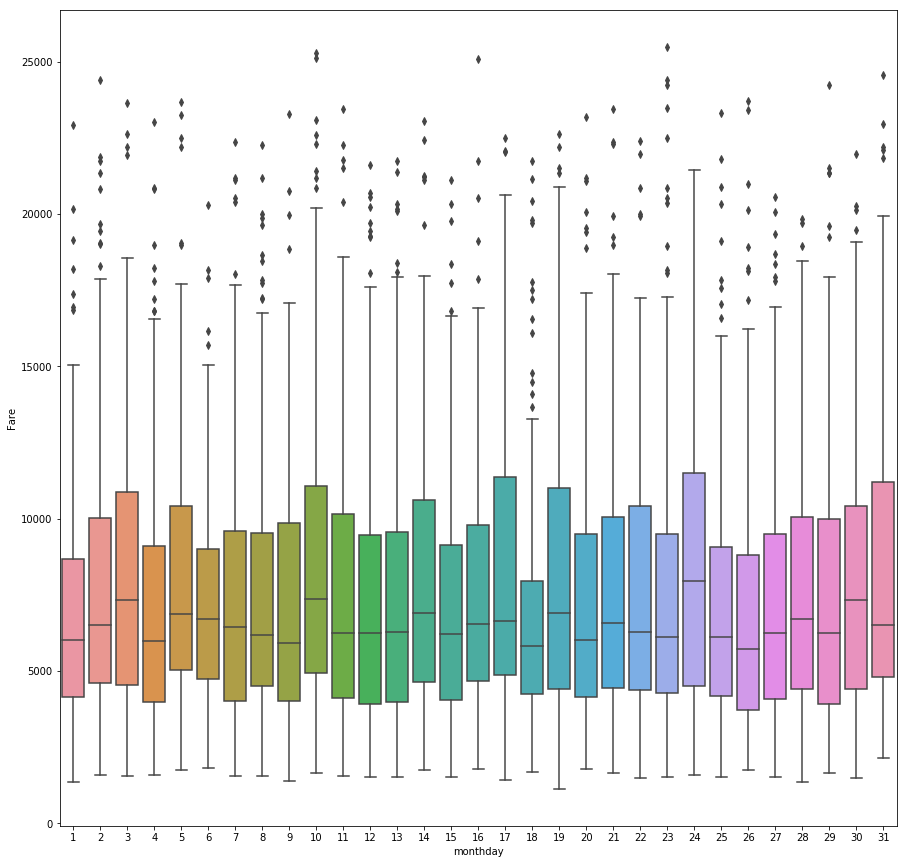

In [13]:
plt.figure(figsize = (15 , 15))
sns.boxplot(y="Fare",x="monthday", data=df)
plt.show()

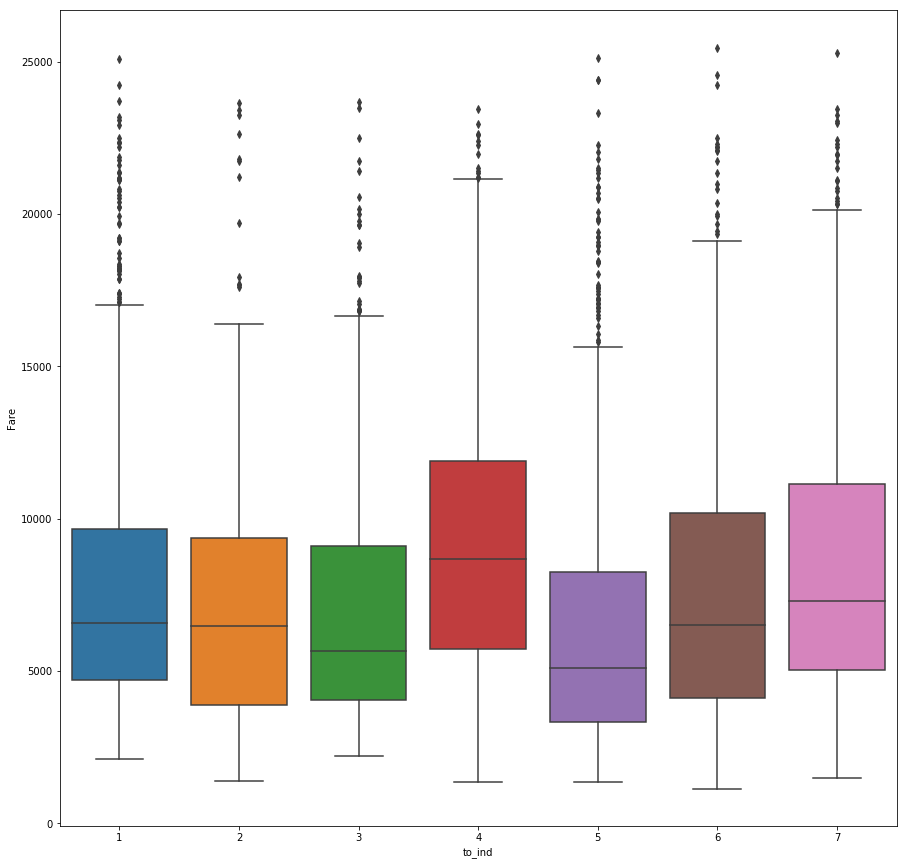

In [14]:
plt.figure(figsize = (15 , 15))
sns.boxplot(y="Fare",x="to_ind", data=df)
plt.show()

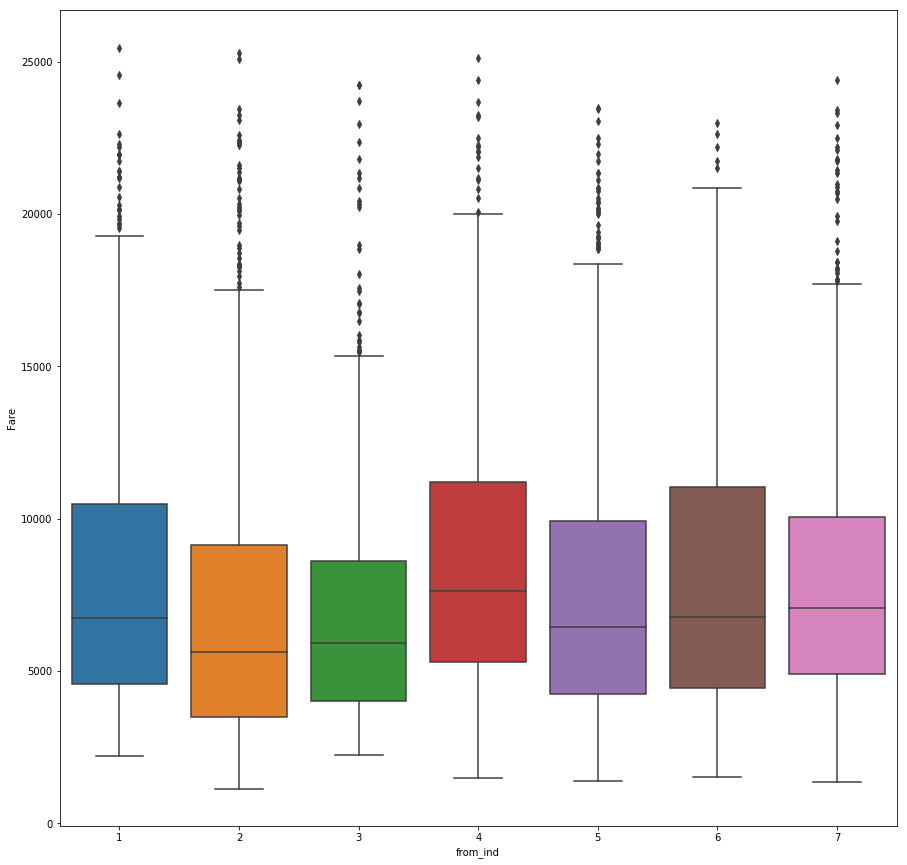

In [15]:
plt.figure(figsize = (15 , 15))
sns.boxplot(y="Fare",x="from_ind", data=df)
plt.show()

1    3726
2     922
3     148
4      21
5       3
Name: demand, dtype: int64


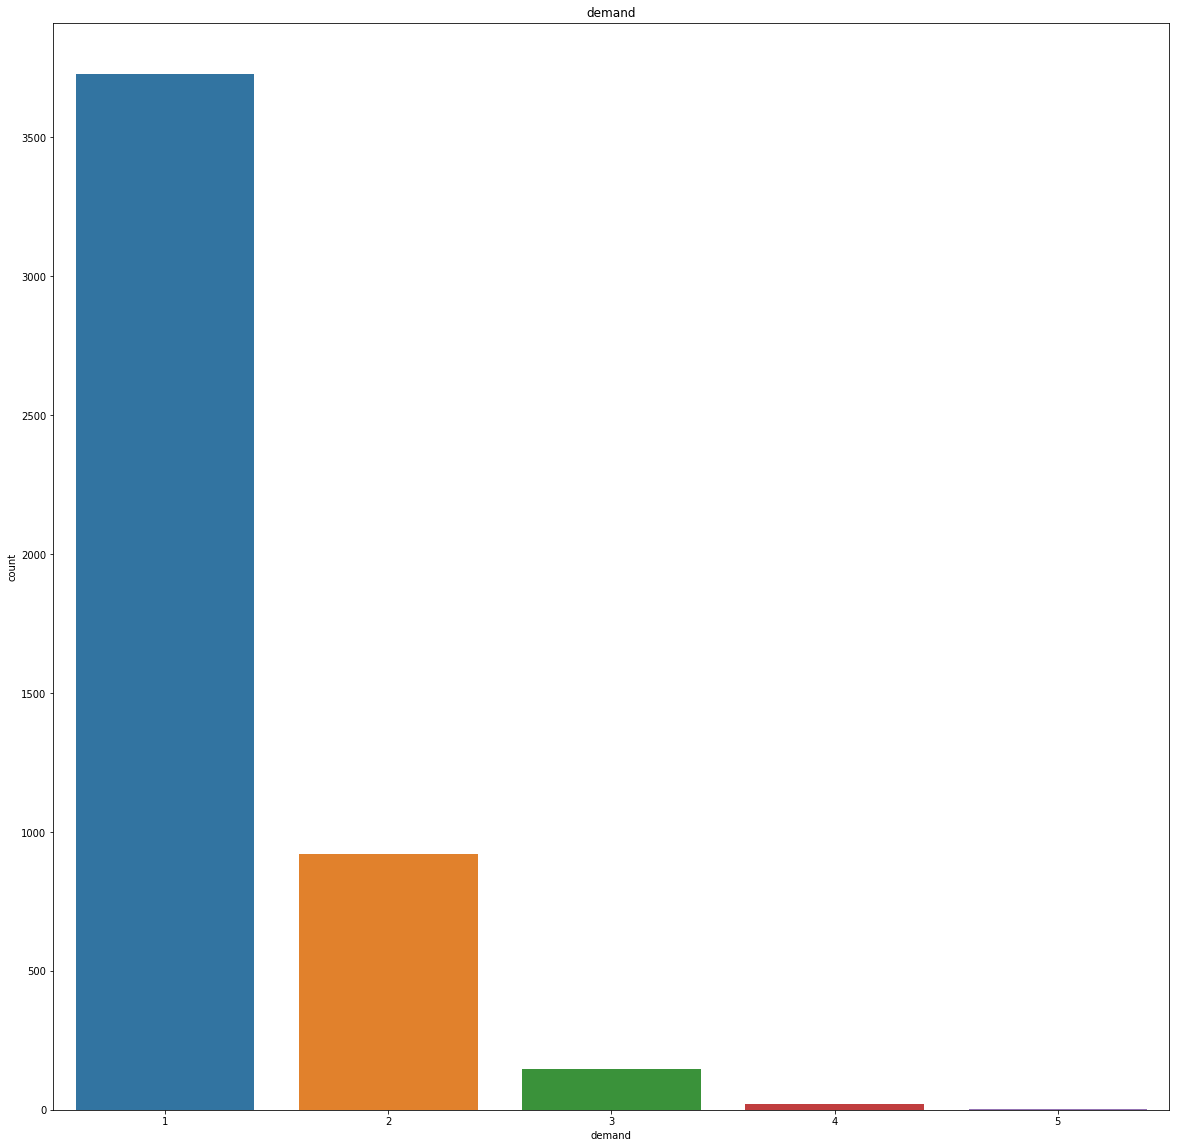

(array([   9,   46,   51,  296,  307,  327,  348,  354,  666,  668,  692,
       1153, 1161, 1165, 1181, 1271, 1438, 1473, 1484, 1495, 1499, 1522,
       1529, 1534, 1713, 1769, 1844, 1889, 1919, 1945, 2041, 2263, 2270,
       2319, 2339, 2342, 2345, 2375, 2516, 2550, 2616, 2642, 2925, 3099,
       3399, 3469], dtype=int64),)
(array([  7, 136, 146, 200, 241, 289, 321, 381, 458, 522, 523, 535, 637,
       679, 693, 785, 823], dtype=int64),)
(array([31, 51, 94], dtype=int64),)
(array([0], dtype=int64),)


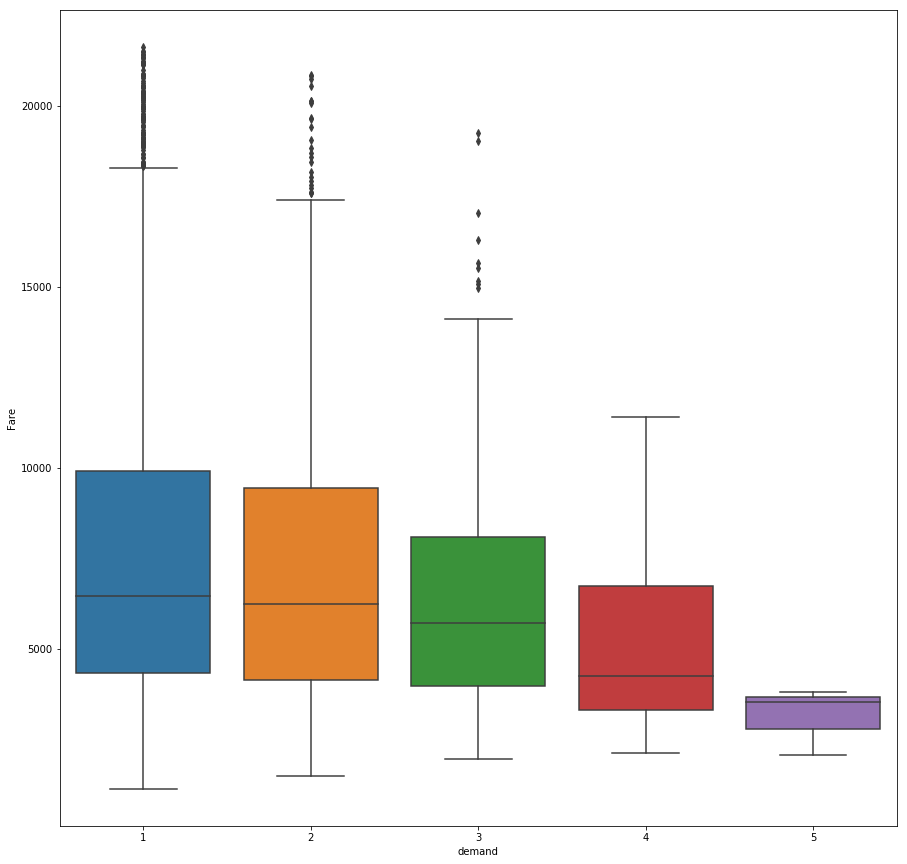

In [16]:
demand_count = df['demand'].value_counts()
print(demand_count)
sns.barplot(demand_count.index, demand_count.values)
plt.title('demand')
plt.ylabel('count')
plt.xlabel('demand')
plt.show()
df1 = df[df['demand'] == 1]
z = np.abs(stats.zscore(df1['Fare']))
print(np.where(z>3))
df1 = df1[(z <3)]

df2 = df[df['demand'] == 2]
z = np.abs(stats.zscore(df2['Fare']))
print(np.where(z>3))
df2 = df2[(z <3)]

df3 = df[df['demand'] == 3]
z = np.abs(stats.zscore(df3['Fare']))
print(np.where(z>3))
df3 = df3[(z <3)]

df4 = df[df['demand'] == 4]
z = np.abs(stats.zscore(df4['Fare']))
print(np.where(z>3))
df4 = df4[(z <3)]

df5 = df[df['demand'] == 5]

df = pd.concat([df1, df2, df3,df4,df5])
plt.figure(figsize = (15 , 15))
sns.boxplot(y="Fare",x="demand", data=df)
plt.show()

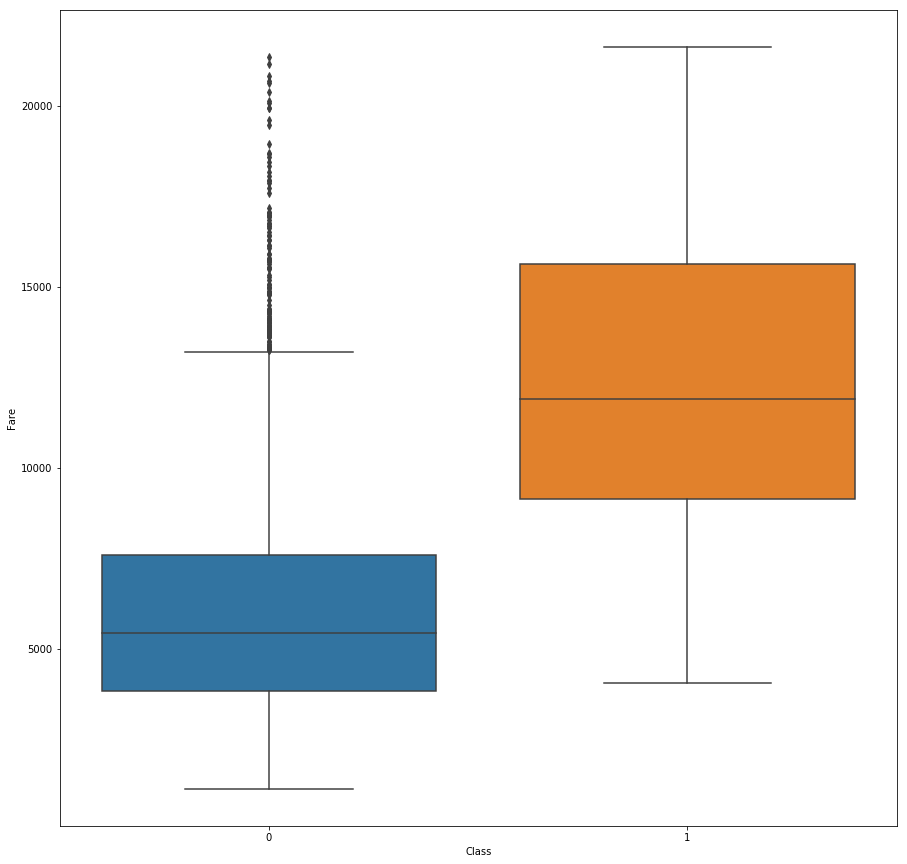

In [17]:
plt.figure(figsize = (15 , 15))
sns.boxplot(x='Class', y='Fare', data=df)

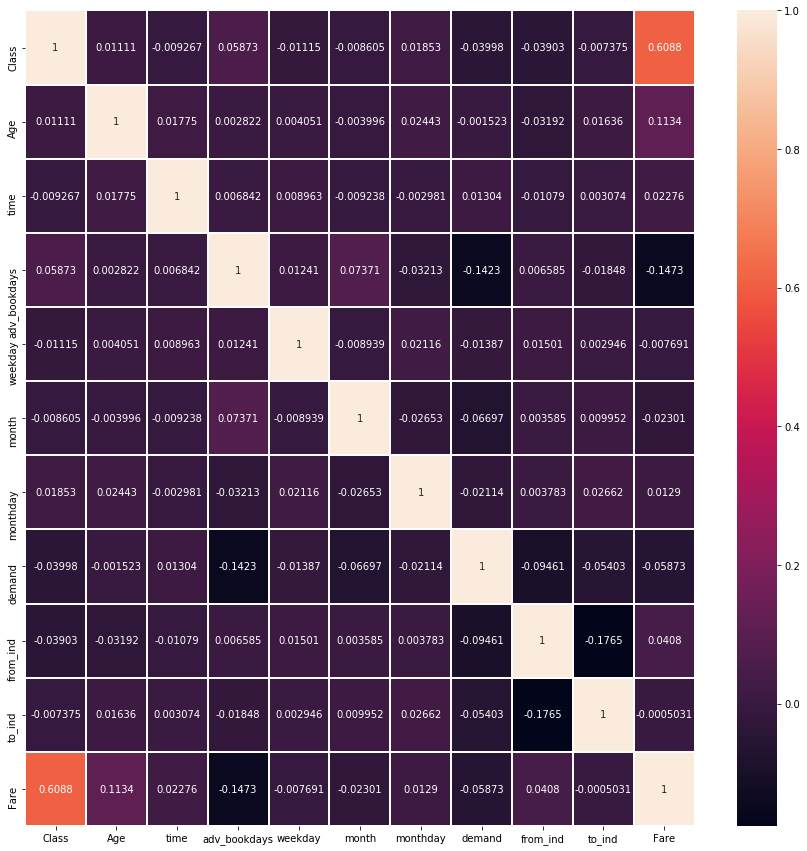

In [18]:
#correlation matrix
R = df.corr()
plt.rcParams["figure.figsize"] = 15,15
sns.heatmap(R, annot = True, fmt = '.4g', linewidths = 1)
plt.show()

In [19]:
#traintest split
x = df.drop(['Fare'], axis = 1)
y = df['Fare']
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     2188.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:45:49   Log-Likelihood:                -36225.
No. Observations:                3802   AIC:                         7.247e+04
Df Residuals:                    3792   BIC:                         7.253e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Class         6546.0250    129.929     50.382      0.000    6291.288    6800.762
Age             34.5375      2.764     12.497      0.000      29.119      39.956
time            96.9019      6.254     15.495      0.000      84.641     109.163
adv_bookdays   -45.3294      3.536    -12.821      0.000     -52.261     -38.398
weekday         55.9568     27.000      2.072      0.038       3.020     108.893
month           15.9243     18.917      0.842      0.400     -21.164      53.013
monthday        12.8663      5.969      2.155      0.031       1.163      24.569
demand          -9.8560     94.896     -0.104      0.917    -195.907     176.195
from_ind       243.3193     26.487      9.186      0.000     191.390     295.249
to_ind         120.7622     25.865      4.669      0.000      70.051     171.473
==============================================================================
Omnibus:                      348.019   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.582
Skew:                           0.728   Prob(JB):                    1.09e-107
Kurtosis:                       3.995   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#regression on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
 #regression on test set
y= regressor.predict(x_test)
np.set_printoptions(precision=3)
#print(np.concat((y.reshape(len(y),1), y_test.reshape((len(y_test),1)),1)))
print(y)

[ 7352.314 12496.818  7039.82   5050.903  7229.964 11463.433  6518.155
 11547.327  6750.203  5004.991  5861.164  6923.097 12132.333  6110.467
  7442.039  7683.56   5534.88   6754.209 12226.644  4884.331  6977.909
  4872.576  6972.013  6494.59   5030.327  5982.232 11658.272 12393.381
 12498.623  6581.059 11571.311  7760.802 12844.131  6875.386  5997.99
  6718.646 12149.917  3588.755  5682.864  6403.821  7256.906  6379.561
  4899.739  7939.763 12085.128  5485.035  8044.13  11656.547  6647.953
  6429.506  9877.35   6924.59   5962.323  6081.942 12205.754  5820.274
  7118.312  5718.685  5936.385 13849.803 12369.419  7396.942  3832.152
  5801.698 12075.53   6210.543  4989.204  5857.526  6401.261  4396.949
 13476.335  6937.714  4958.345  5110.37  11580.756  5520.555 12785.89
  6571.492  5311.605  5967.797  5956.711  6863.351  4756.712  7716.065
  6988.584  4941.974  6214.296 13358.587  7540.152 12463.692  6954.6
  7387.396  6413.975  6185.306  4882.864  6647.458  4553.817  7968.741
  6097.903

In [22]:
 #prediction
tdata= data.parse('TestDataSet')
df= pd.DataFrame(tdata)
del df['SL. No.']
df

,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
0,0,44.6,34,5,5,2,11,1,7,2,NaN
1,0,70.2,39,17,3,7,10,1,6,2,NaN
2,0,42.1,31,54,4,8,1,1,7,2,NaN
3,0,47.5,36,32,3,4,11,1,1,2,NaN
4,0,40.1,30,16,3,3,13,1,1,2,NaN
5,1,26.8,37,20,5,9,7,1,4,2,NaN
6,1,42.0,26,25,3,4,4,2,5,2,NaN
7,0,34.7,40,14,6,1,27,1,6,2,NaN
8,0,73.9,36,29,5,9,21,2,1,2,NaN
9,0,31.4,41,26,1,4,9,2,1,2,NaN


In [23]:
#to fit model for given test set

In [24]:
x = df.drop(['Fare'], axis = 1)
y = df['Fare']
model = sm.OLS(y, x).fit()
model.summary()

C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1429: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 09 Jan 2022   Prob (F-statistic):                nan
Time:                        22:45:50   Log-Likelihood:                    nan
No. Observations:                1001   AIC:                               nan
Df Residuals:                     991   BIC:                               nan
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Class               nan        nan        nan        nan         nan         nan
Age                 nan        nan        nan        nan         nan         nan
time                nan        nan        nan        nan         nan         nan
adv_bookdays        nan        nan        nan        nan         nan         nan
weekday             nan        nan        nan        nan         nan         nan
month               nan        nan        nan        nan         nan         nan
monthday            nan        nan        nan        nan         nan         nan
demand              nan        nan        nan        nan         nan         nan
from_ind            nan        nan        nan        nan         nan         nan
to_ind              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         285.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y= regressor.predict(x)
np.set_printoptions(precision=3)
print(y)

[ 7616.893  7347.299  4625.29  ...  6043.09  12707.988  7116.976]


In [26]:
model.summary()

C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Arunima Dutta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1429: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 09 Jan 2022   Prob (F-statistic):                nan
Time:                        22:45:51   Log-Likelihood:                    nan
No. Observations:                1001   AIC:                               nan
Df Residuals:                     991   BIC:                               nan
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Class               nan        nan        nan        nan         nan         nan
Age                 nan        nan        nan        nan         nan         nan
time                nan        nan        nan        nan         nan         nan
adv_bookdays        nan        nan        nan        nan         nan         nan
weekday             nan        nan        nan        nan         nan         nan
month               nan        nan        nan        nan         nan         nan
monthday            nan        nan        nan        nan         nan         nan
demand              nan        nan        nan        nan         nan         nan
from_ind            nan        nan        nan        nan         nan         nan
to_ind              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         285.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""